# VCG SPRING 2021: Numpy and Pandas Workshop // Intro to Data Science
Created by Rithvik Sunku
***

We will be using ***Jupyter Notebook***, a commonly used Python executable environemnt, to teach you the following:
 - Data Collection (Kinda)
 - Data Cleaning/Preparation
 - Exploratory Data Analysis
 - Data Visualization
 - And some commonly used libraries for data analysis

*documentation for [numpy](https://numpy.org/doc/), [pandas](https://pandas.pydata.org/docs/), and [seaborn](https://seaborn.pydata.org/introduction.html) is listed here*

To get started, load in `pandas`, `numpy`, `seaborn`, and `IPython`:

In [56]:
import pandas as pd #table manipulations library
import numpy as np #math, linear alg, and arrays library
import seaborn as sns #plotting library
import matplotlib.pyplot as plt #assists seaborn with visualizations
%matplotlib inline
from IPython.display import Image #for importing images (not relevant)

*For any consulting related task that requires data science, follow this commonly used diagram to answer problem at hand:*

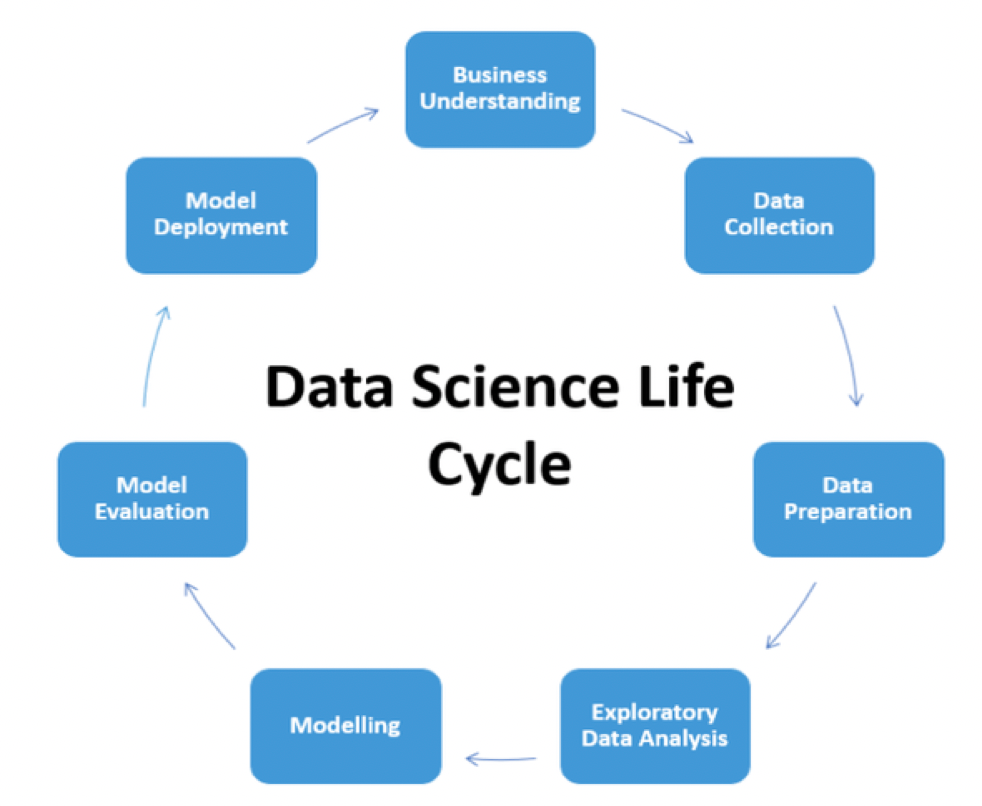

In [57]:
#used to display images!
Image(filename='datascience_lifecycle.png', width=400)

## Data Collection (Kinda)
***
### We will use the following [dataset](https://www.kaggle.com/nicklauskim/nba-per-game-stats-201920?select=nba_2020_shooting.csv) which is player data for the 2019-2020 NBA season:

In [58]:
#read in a csv, a common format of data, into a pandas data frame (also known as a table)
nba = pd.read_csv('nba_2020_advanced.csv')

#this line will display the first 5 rows of the data by defaukt or as many as you want (specify in the parentheses)
nba.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,0.604,0.006,0.421,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,0.598,0.018,0.484,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,0.571,0.198,0.241,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,13,4.7,0.500,0.000,0.000,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,0.473,0.500,0.139,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4


## Data Cleaning/Preparation

***
### In most cases the data will not look so pretty, so you may have null values (missing data), but this dataset does not because it has been pre-processed. 

To see if there any null values we will access one column and see if any values are null using `numpy` and `pandas`

If you want to access a column, you can access it using the `tbl['column name here']` command and converting it to an easier to look at format can be done using `.to_numpy()` which will get it in an array so we can use numpy commands!

In [59]:
nba_positions = nba['Pos'].to_numpy()
nba_positions

array(['C', 'PF', 'C', 'PF', 'SG', 'SG', 'C', 'SG', 'PF', 'SF', 'PF', 'C',
       'PF', 'PF', 'SF', 'PF', 'SF', 'PG', 'SF', 'SF', 'SF', 'PG', 'C',
       'SG', 'PF', 'PG', 'C', 'PG', 'PF', 'SG', 'SF', 'SF', 'SF', 'SF',
       'SF', 'C', 'SF-SG', 'SF', 'SG', 'PF', 'SG', 'SG', 'SG', 'SG', 'SG',
       'C-PF', 'C', 'PF', 'SG', 'SF', 'SF', 'SF', 'PF', 'PG', 'C', 'C',
       'C', 'PF', 'PG', 'SG', 'SF', 'SF', 'PF', 'PF', 'PF', 'C', 'PG',
       'SF', 'SG', 'PF', 'SG', 'PG', 'SG', 'C', 'PF', 'SF', 'SG', 'SF',
       'SF', 'SF', 'SG', 'PG', 'SG', 'SG', 'SG', 'SF', 'C', 'SF', 'SG',
       'PG', 'C', 'SG', 'PG', 'PG', 'PG', 'SG', 'SG', 'SG', 'SG', 'SF',
       'C', 'C', 'C', 'C', 'SG', 'SF', 'C', 'SF-PF', 'SF', 'PF', 'PG',
       'SF', 'C', 'SG', 'PG', 'C', 'C', 'C', 'C', 'SF', 'PG', 'SF', 'PG',
       'PG', 'PG', 'PF', 'PF', 'PF', 'PF', 'PF', 'SG', 'SG', 'SG', 'PF',
       'SG', 'SG', 'SG', 'PF', 'PF', 'PG', 'SG', 'PG', 'PF', 'PF', 'PF',
       'PF-C', 'PF', 'C', 'SG', 'SG', 'SG', 'SF', 'SG', 

Now, we can see if there are any null values, although you can just verify by looking if it is a small dataset like this. To do so, we want to see if any values in our array are equal to `np.nan`. The `any` allow us to see if any values are actually == np.nan:

In [60]:
any(nba_positions == np.nan)

False

 Looks like we're good! Let's also verify that all positions are there. To do so we can use the `.unique()` command in `numpy`.

In [61]:
nba_positions_unique = np.unique(nba_positions)
nba_positions_unique

array(['C', 'C-PF', 'PF', 'PF-C', 'PG', 'SF', 'SF-PF', 'SF-SG', 'SG'],
      dtype=object)

To access a specific value from this array we can index into them using `array[start, stop (optional), increment(optional)]`:

In [62]:
nba_positions_unique[0]

'C'

Let's also verify that there is one row for each player as this could interfere with things in the future. We can do this using the `pandas` command `.value_counts()` alongisde indexing into the `Player` column:

In [63]:
nba['Player'].value_counts()

Jordan McRae          4
Anthony Tolliver      4
Jeff Teague           3
Tyler Cook            3
Glenn Robinson III    3
                     ..
Patrick McCaw         1
Devin Booker          1
Chris Clemons         1
Miles Bridges         1
Udonis Haslem         1
Name: Player, Length: 529, dtype: int64

Looks like there are multiple counts for some players. 

`Exercise:` Why do you think this is?

***insert answer here***

For the purposes of this demo, let's just keep the first row of the duplicate names and drop the duplicates. To do so we will use the `tbl.drop_duplicates([COLUMN(S)], keep='FIRST OR LAST` commmand.

In [64]:
nba = nba.drop_duplicates(['Player'], keep='first')
nba.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,0.604,0.006,0.421,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,0.598,0.018,0.484,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,0.571,0.198,0.241,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,13,4.7,0.500,0.000,0.000,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,0.473,0.500,0.139,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4


Other data cleaning in cludes filter the data for certain characteristics. For this purposes of this demo, we will only be working with the `Player`, `Pos`, `Age`, and `3PAr` columns. 

`Exercise:` Using this [documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html), see if you can figure out how to select our columns of interest in the right order.

In [65]:
nba = ### INSERT YOUR ANSWER HERE ###
nba.head()

,Player,Pos,Age,3PAr
0,Steven Adams,C,26,0.006
1,Bam Adebayo,PF,22,0.018
2,LaMarcus Aldridge,C,34,0.198
3,Kyle Alexander,PF,23,0.000
4,Nickeil Alexander-Walker,SG,21,0.500


Run this cell below to see if you got the right ouput!

In [66]:
print('CORRECT OUTPUT:', all(nba.columns == ['Player', 'Pos', 'Age', '3PAr']))

CORRECT OUTPUT: True


## Exploratory Data Analysis/Data Visualization

***
### Let's try to see if there are any trends with the columns we grabbed from above:

`tbl.describe()` gives us some summary statistics about the data by column. The percentages are percentile values and the rest should be self explanatory.

In [67]:
nba.describe()

,Age,3PAr
count,529.000000,527.000000
mean,25.561437,0.381846
std,4.119487,0.207077
min,19.000000,0.000000
25%,22.000000,0.259500
50%,25.000000,0.397000
75%,28.000000,0.515000
max,43.000000,1.000000


Let's also look at the data types to see if they are text or numbers:

In [68]:
nba.dtypes

Player     object
Pos        object
Age         int64
3PAr      float64
dtype: object

Floats are decimal numbers but in most cases you can just treat it as any other numerical value! Objects usually mean the value is a string (text).

### This is helpful but let's take a look at if relationship of the Age and 3pt Attempt Rate Columns. To do so we will plot them on a line plot and take a look at their distributions as well.

We will use `seaborn` and `matplotlib` for both of these plots. These are the most common ones and you will definitely use these if needed in a project. To do so you can plug in any of the numerical data into this line of code below:

Text(0.5,1,'Age vs. 3PAr')

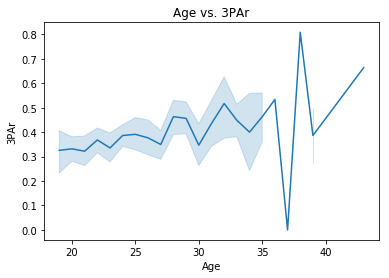

In [69]:
#LINE PLOT - Good for detecting correlation of columns
sns.lineplot(data=nba, x="Age", y="3PAr")
#These allow you to add a title to the visualization which is always important!
plt.plot()
plt.title('Age vs. 3PAr')

Repeated observations are aggregated even when semantic grouping is used which is why you get the hue around the line.

`Exercise:` Why do you think there is no hue and and change in the trend after 34-ish? What might you take away from this graph given the trend?

***insert answer here***

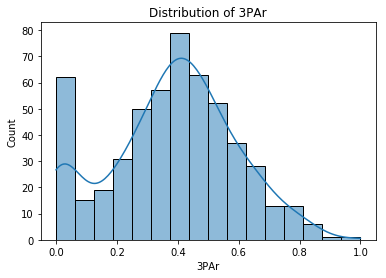

In [70]:
#HISTOGRAM - good for detecting spread of data, kde allows us to see the approximate shape with a smooth curve (Kernal Density Estimate)
sns.histplot(data=nba,x='3PAr', kde=True)
plt.title('Distribution of 3PAr')
plt.show()

Looks like it is a relatively smooth curve centered around 0.4 which seems accurate given the current play style of NBA players.

`Exercise:` Create a histogram to see the distribution of Ages

Text(0.5,1,'Distribution of Age')

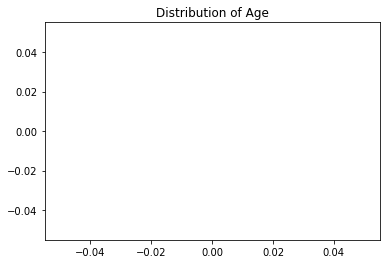

In [71]:
### INSERT YOUR CODE HERE

plt.plot()
plt.title('Distribution of Age')

We also might want to compare by position say 3PAr for Centers vs Point Guards. To do so, we can filter the data using `tbl = tbl[tbl[COLUMN NAME] == CERTAIN VALUE]`. Lets create a data frame for just centers and just point guards and plot histograms for each one.

In [72]:
pg = nba[nba['Pos'] == 'PG']
center = nba[nba['Pos'] == 'C']
display(pg.head(), center.head())

,Player,Pos,Age,3PAr
17,Ryan Arcidiacono,PG,25,0.627
21,D.J. Augustin,PG,32,0.436
25,Lonzo Ball,PG,22,0.575
27,J.J. Barea,PG,35,0.411
53,Patrick Beverley,PG,31,0.604


,Player,Pos,Age,3PAr
0,Steven Adams,C,26,0.006
2,LaMarcus Aldridge,C,34,0.198
6,Jarrett Allen,C,21,0.013
11,Ryan Anderson,C,31,0.714
22,Deandre Ayton,C,21,0.023


You can overlay plots as well if they have the same axes:

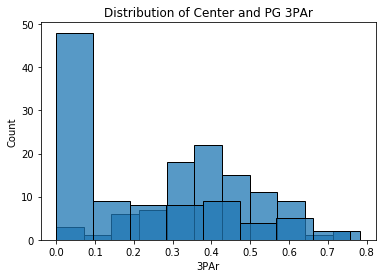

In [81]:
sns.histplot(data=pg,x='3PAr')
sns.histplot(data=center,x='3PAr')

plt.title('Distribution of Center and PG 3PAr')
plt.show()

Alternatively, you can plot them directly and seaborn will make a distribution for each type of position. Most times, this is a better approach because better formatting is done by seaborn and it will just look prettier and take less time to make!

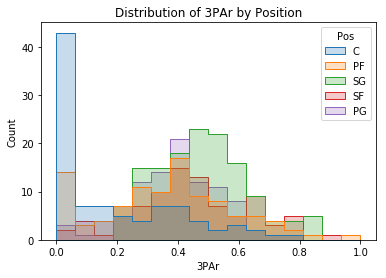

In [74]:
#getting rid of those who play multiple positions
positions = ['C','PG','SG','SF','PF']
good_rows = nba.Pos.isin(positions)
nba = nba[good_rows]

#plotting results
sns.histplot(data=nba, x="3PAr", hue="Pos",element="step")
plt.title('Distribution of 3PAr by Position')
plt.show()

## Put Your Skills To Work!

***


`Exercise:` For your final task, you will use your newfound data science knowledge to:
   1. Find some columns of interest in this [dataset](https://www.kaggle.com/michau96/restaurant-business-rankings-2020?select=Top250.csv) (Fast Food data)
   2. Clean if necessary
   3. Make some sort of visualization
   4. Present its relevance
   
Feel free to use as many cells as you would like!

In [75]:
file_name = 'Top250.csv'

In [76]:
### INSERT YOUR CODE HERE###







Congrats! You are now a data siens god :) Please run last cell for a meme for your hard work.

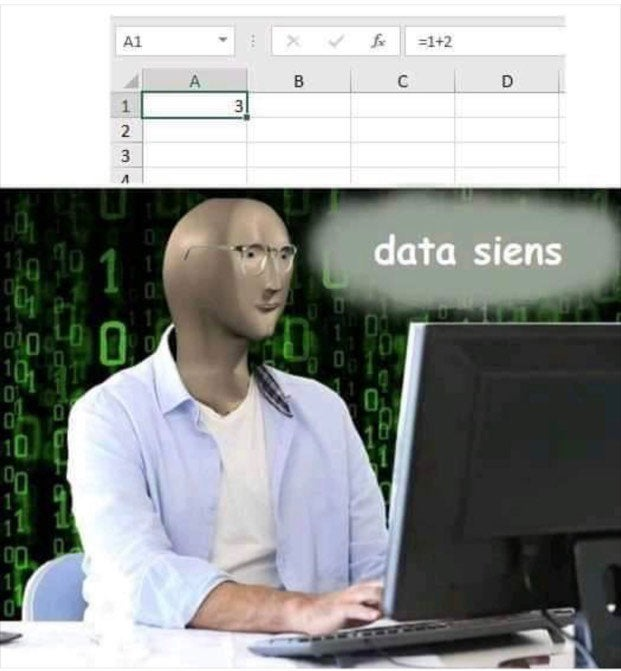

In [78]:
Image(filename='meme.jpeg', width=400)